# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_MiChat_1.csv")
df.head()

,userName,score,at,content
0,Ahmad Deri,1,2024-05-06 07:18:23,Tiap detik iklan
1,Luviatun Muna,5,2024-05-06 06:44:41,TOP B G T
2,Aqilla Sukmawati,5,2024-05-06 06:43:30,Mantap
3,Rendi Andika,5,2024-05-06 06:42:45,Baik
4,Jepri Pramana,5,2024-05-06 06:37:03,Memuaskan


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Tiap detik iklan,Ahmad Deri,2024-05-06 07:18:23
1,TOP B G T,Luviatun Muna,2024-05-06 06:44:41
2,Mantap,Aqilla Sukmawati,2024-05-06 06:43:30
3,Baik,Rendi Andika,2024-05-06 06:42:45
4,Memuaskan,Jepri Pramana,2024-05-06 06:37:03
...,...,...,...
194,wow iklannya sedikit +lagi iklannya dong biar ...,30. Ni Made Mutia Ayu Raraswatii,2024-05-04 12:57:11
195,Bagus sih..tp sayang harus top up dlh,Saldhy Cip,2024-05-04 12:18:31
196,Top,Rusli Anwar,2024-05-04 12:11:02
197,Oke.,Wahyudi ris,2024-05-04 11:58:16


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   199 non-null    object
 1   userName  199 non-null    object
 2   at        199 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,199,199,199
unique,153,199,199
top,Bagus,Ahmad Deri,2024-05-06 07:18:23
freq,12,1,1


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(199, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(153, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih
  text = re.sub(r"[0-9]+", "", text) # Menghapus Angka

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,tiap detik iklan,Ahmad Deri,2024-05-06 07:18:23
1,top b g t,Luviatun Muna,2024-05-06 06:44:41
2,mantap,Aqilla Sukmawati,2024-05-06 06:43:30
3,baik,Rendi Andika,2024-05-06 06:42:45
4,memuaskan,Jepri Pramana,2024-05-06 06:37:03
...,...,...,...
193,cukup menarik,Siti Rohmawati,2024-05-04 13:17:22
194,wow iklannya sedikit lagi iklannya dong biar s...,30. Ni Made Mutia Ayu Raraswatii,2024-05-04 12:57:11
195,bagus sihtp sayang harus top up dlh,Saldhy Cip,2024-05-04 12:18:31
197,oke,Wahyudi ris,2024-05-04 11:58:16


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,tiap detik iklan,Ahmad Deri,2024-05-06 07:18:23
1,top b g t,Luviatun Muna,2024-05-06 06:44:41
2,mantap,Aqilla Sukmawati,2024-05-06 06:43:30
3,baik,Rendi Andika,2024-05-06 06:42:45
4,memuaskan,Jepri Pramana,2024-05-06 06:37:03
...,...,...,...
193,cukup menarik,Siti Rohmawati,2024-05-04 13:17:22
194,wow iklannya sedikit lagi iklannya dong biar s...,30. Ni Made Mutia Ayu Raraswatii,2024-05-04 12:57:11
195,bagus sihtp sayang harus top up dlh,Saldhy Cip,2024-05-04 12:18:31
197,oke,Wahyudi ris,2024-05-04 11:58:16


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.1 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,tiap detik iklan,Ahmad Deri,2024-05-06 07:18:23
1,top b g t,Luviatun Muna,2024-05-06 06:44:41
2,mantap,Aqilla Sukmawati,2024-05-06 06:43:30
3,baik,Rendi Andika,2024-05-06 06:42:45
4,memuaskan,Jepri Pramana,2024-05-06 06:37:03
...,...,...,...
193,cukup menarik,Siti Rohmawati,2024-05-04 13:17:22
194,wow iklannya sedikit iklannya dong biar sekali...,30. Ni Made Mutia Ayu Raraswatii,2024-05-04 12:57:11
195,bagus sihtp sayang top up dlh,Saldhy Cip,2024-05-04 12:18:31
197,oke,Wahyudi ris,2024-05-04 11:58:16


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                   [tiap, detik, iklan]
1                                         [top, b, g, t]
2                                               [mantap]
3                                                 [baik]
4                                            [memuaskan]
                             ...                        
193                                     [cukup, menarik]
194    [wow, iklannya, sedikit, iklannya, dong, biar,...
195                 [bagus, sihtp, sayang, top, up, dlh]
197                                                [oke]
198    [aplikasi, sialan, udah, uninstall, masig, ikl...
Name: content, Length: 153, dtype: object

In [19]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_MiChat_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_MiChat_1.csv', encoding = 'latin1')
df_clean

,content
0,tiap detik iklan
1,top b g t
2,mantap
3,baik
4,muas
...,...
148,cukup tarik
149,wow iklan sedikit iklan dong biar sekali nonto...
150,bagus sihtp sayang top up dlh
151,oke


# **Translate**

In [21]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [22]:
# import pandas as pd
# from easynmt import EasyNMT

In [23]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_MiChat_1.csv', encoding='latin1')

In [24]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [25]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [26]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [27]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_MiChat_1.csv')

In [28]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_MiChat_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,tiap detik iklan,every second of advertising
1,1,top b g t,top b g t
2,2,mantap,Steady.
3,3,baik,Okay.
4,4,muas,Mussels
...,...,...,...
148,148,cukup tarik,Just pull.
149,149,wow iklan sedikit iklan dong biar sekali nonto...,"fontcolor="" # FFFF00""wow ad fontcolor="" # FFFF..."
150,150,bagus sihtp sayang top up dlh,Good job dear top up dlh
151,151,oke,Okay.


# **Labeling**

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_MiChat_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,tiap detik iklan,every second of advertising
1,1,top b g t,top b g t
2,2,mantap,Steady.
3,3,baik,Okay.
4,4,muas,Mussels
...,...,...,...
148,148,cukup tarik,Just pull.
149,149,wow iklan sedikit iklan dong biar sekali nonto...,"fontcolor="" # FFFF00""wow ad fontcolor="" # FFFF..."
150,150,bagus sihtp sayang top up dlh,Good job dear top up dlh
151,151,oke,Okay.


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 68
Netral = 70
Negatif = 15

Total Data Seluruhnya : 153


In [33]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,tiap detik iklan,every second of advertising,Netral
1,1,top b g t,top b g t,Positif
2,2,mantap,Steady.,Positif
3,3,baik,Okay.,Positif
4,4,muas,Mussels,Netral
...,...,...,...,...
148,148,cukup tarik,Just pull.,Netral
149,149,wow iklan sedikit iklan dong biar sekali nonto...,"fontcolor="" # FFFF00""wow ad fontcolor="" # FFFF...",Negatif
150,150,bagus sihtp sayang top up dlh,Good job dear top up dlh,Positif
151,151,oke,Okay.,Positif


In [34]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,tiap detik iklan,every second of advertising,Netral
1,top b g t,top b g t,Positif
2,mantap,Steady.,Positif
3,baik,Okay.,Positif
4,muas,Mussels,Netral
...,...,...,...
148,cukup tarik,Just pull.,Netral
149,wow iklan sedikit iklan dong biar sekali nonto...,"fontcolor="" # FFFF00""wow ad fontcolor="" # FFFF...",Negatif
150,bagus sihtp sayang top up dlh,Good job dear top up dlh,Positif
151,oke,Okay.,Positif


# **Visualisasi**


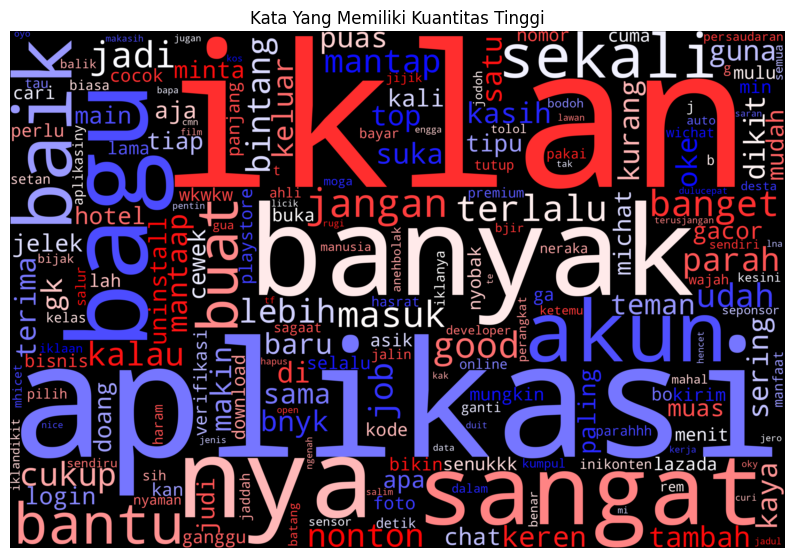

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


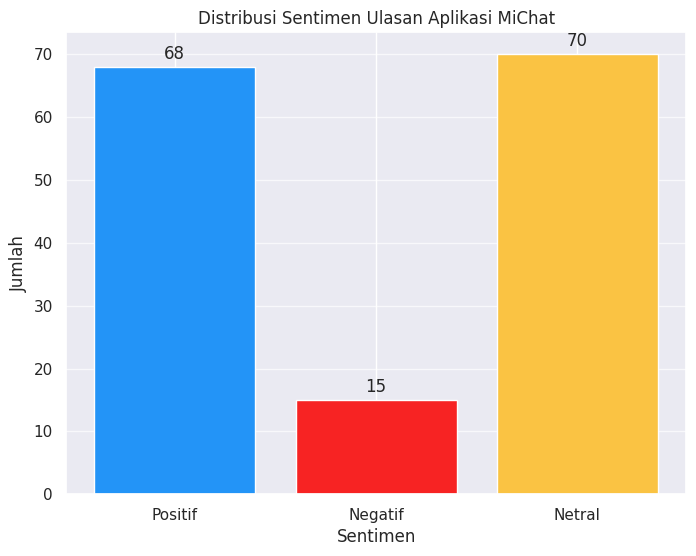

In [36]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi MiChat")


In [37]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
1,top b g t,top b g t,Positif
2,mantap,Steady.,Positif
3,baik,Okay.,Positif
10,keren sekali,That's cool.,Positif
11,good,good,Positif
...,...,...,...
147,bagus aplikasi,good application,Positif
149,wow iklan sedikit iklan dong biar sekali nonto...,"fontcolor="" # FFFF00""wow ad fontcolor="" # FFFF...",Negatif
150,bagus sihtp sayang top up dlh,Good job dear top up dlh,Positif
151,oke,Okay.,Positif


In [38]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
1,top b g t,top b g t,1
2,mantap,Steady.,1
3,baik,Okay.,1
10,keren sekali,That's cool.,1
11,good,good,1
...,...,...,...
147,bagus aplikasi,good application,1
149,wow iklan sedikit iklan dong biar sekali nonto...,"fontcolor="" # FFFF00""wow ad fontcolor="" # FFFF...",0
150,bagus sihtp sayang top up dlh,Good job dear top up dlh,1
151,oke,Okay.,1


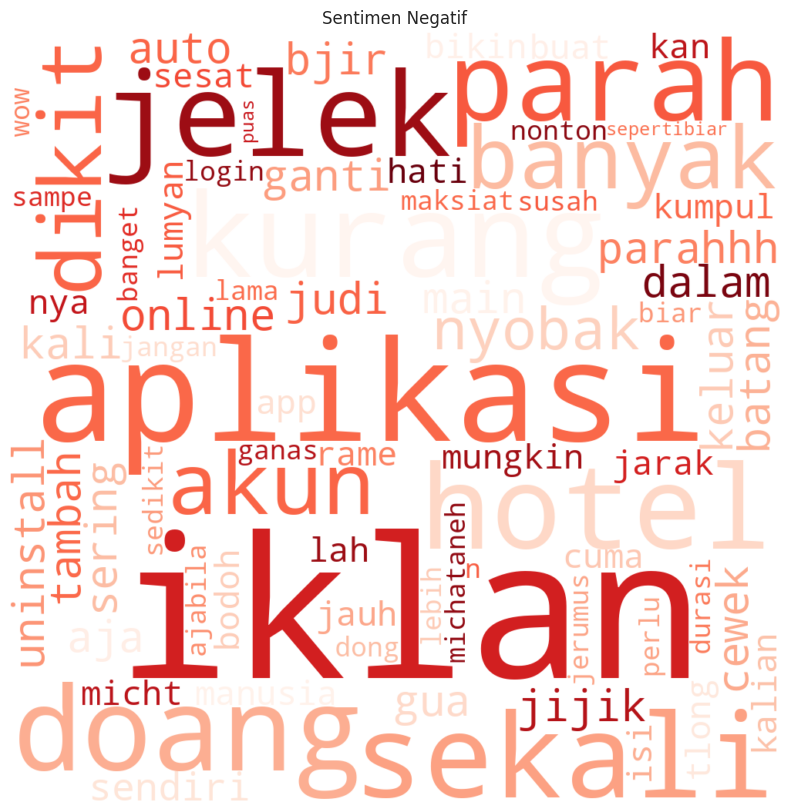

In [39]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

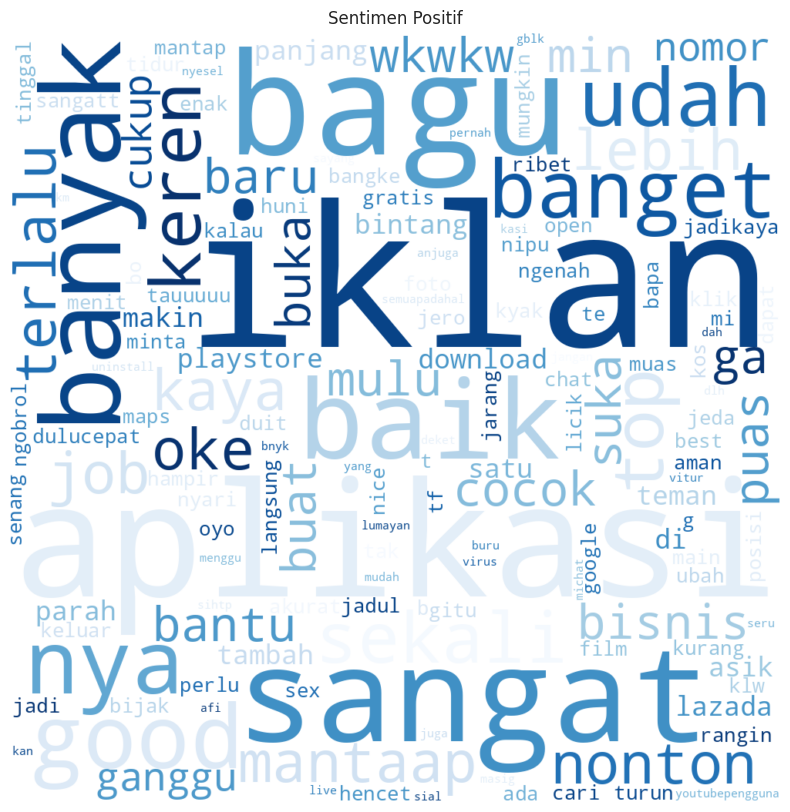

In [40]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [41]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    68
0    15
Name: count, dtype: int64

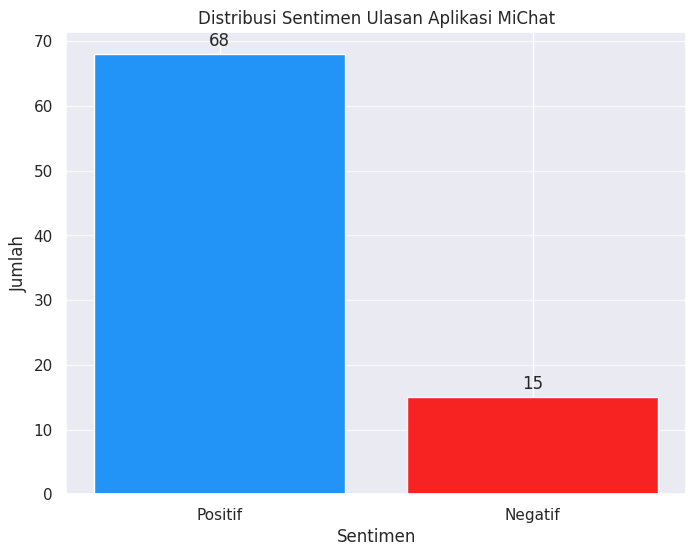

In [42]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi MiChat")

# **Data Preparation & Modeling**

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [44]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
X_train

120                              mudah afi kasi nya bagu
104    aplikasi cari teman tidur buat sex enak banget...
78                                                  baik
19                                    kurang hotel doang
113         kurang muas jarang google maps akurat posisi
                             ...                        
44                                                   oke
110                  sangat puas banget ngobrol aplikasi
136                 aplikasi terlalu banyak iklan menggu
32     aplikasi sering keluar sendiri mungkin bikin k...
98                            iklan kaya ada jeda bangke
Name: content, Length: 66, dtype: object

In [46]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
vectorizer.fit(X_train)


CountVectorizer()

In [47]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [48]:
X_train_vec.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [49]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_vec, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.9411764705882353
Akurasi untuk c = 0.05: 0.9411764705882353
Akurasi untuk c = 0.25: 0.9411764705882353
Akurasi untuk c = 0.5: 0.9411764705882353
Akurasi untuk c = 0.75: 0.9411764705882353
Akurasi untuk c = 1: 0.9411764705882353


In [50]:
svm = LinearSVC(C = 1.0)
svm.fit(X_train_vec, y_train)

LinearSVC()

In [51]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.9411764705882353 


In [59]:
y_pred = svm.predict(X_test_vec)
print('Accuracy Of SVM Classfier On Test Set: {:.2f}' .format(svm.score(X_test_vec, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accuracy Of SVM Classfier On Test Set: 0.94
[[ 0  1]
 [ 0 16]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.94      1.00      0.97        16

    accuracy                           0.94        17
   macro avg       0.47      0.50      0.48        17
weighted avg       0.89      0.94      0.91        17



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives (TP) = ', cm[0, 0])  # Assuming positive class is at index 0

print('\nTrue Negatives (TN) = ', cm[1, 1])  # Assuming negative class is at index 1

print('\nFalse Positives (FP) = ', cm[0, 1])

print('\nFalse Negatives (FN) = ', cm[1, 0])

print('\nAccuracy = ', accuracy)

Confusion matrix

 [[ 0  1]
 [ 0 16]]

True Positives (TP) =  0

True Negatives (TN) =  16

False Positives (FP) =  1

False Negatives (FN) =  0

Accuracy =  0.9411764705882353


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

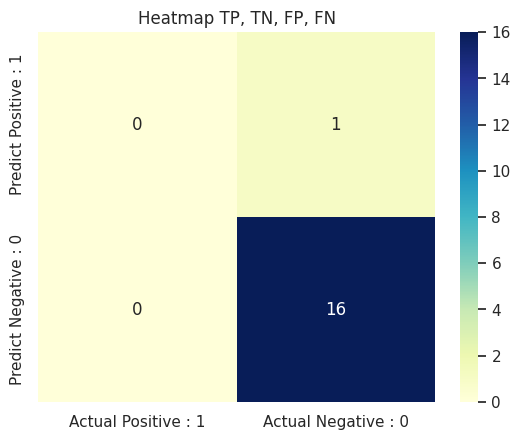

In [54]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive : 1', 'Actual Negative : 0'],
                                 index=['Predict Positive : 1', 'Predict Negative : 0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [55]:
# Classification Accuracy

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [56]:
# Classification Accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9412


In [57]:
# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0588


# **Testing**


In [61]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = svm.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : aplikasi jelek, nipu juga
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [62]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = svm.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : good
Hasil Analisis Sentimen Untuk Teks Baru : Positif
